In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### Version Used for the Library are

In [2]:
print("Pandas Version       : {}".format(pd.__version__))
print("Numpy  Version       : {}".format(np.__version__))
print("Seaborn Version      : {}".format(sns.__version__))
print("Matplotlib Version   : {}".format(matplotlib.__version__))
print("StatModel Version    : {}".format(sm.__version__))

Pandas Version       : 1.3.4
Numpy  Version       : 1.20.3
Seaborn Version      : 0.11.2
Matplotlib Version   : 3.4.3
StatModel Version    : 0.12.2


In [3]:
!ls

Assignment -  Advanced Regression.ipynb train.csv


In [4]:
# import the csv
df = pd.read_csv('train.csv')

In [5]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1341,1342,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,155000
767,768,50,RL,75.0,12508,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,1300,7,2008,WD,Normal,160000
442,443,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,162900
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
468,469,20,RL,98.0,11428,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,250000


In [6]:
# Check the features and the count 
display(df.columns) 
len(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

81

In [7]:
# We can find that it is mixture of numerical  ( float/int) and object

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.shape

(1460, 81)

In [9]:
df.size

118260

In [10]:
#Check Nullvalues in Column wise and shows 
# You can see some of them  Alley/Fence/PoolQC and Misc Fetures are > 1000 null values 

## LotFrontage: Linear feet of street connected to property

### Alley: Type of alley access to property

       #Grvl	Gravel
       #Pave	Paved
       # NA 	No alley access
    
##MiscFeature: Miscellaneous feature not covered in other categories
		
       #Elev	Elevator
       #Gar2	2nd Garage (if not described in garage section)
       #Othr	Other
       #Shed	Shed (over 100 SF)
       #TenC	Tennis Court
       #NA	None
    
### PoolQC: Pool quality
		
       #Ex	Excellent
       #Gd	Good
       #TA	Average/Typical
       #Fa	Fair
       #NA	No Pool
		
### Fence: Fence quality
		
       #GdPrv	Good Privacy
       #MnPrv	Minimum Privacy
       #GdWo	Good Wood
       #MnWw	Minimum Wood/Wire
       #NA	No Fence

### FireplaceQu: Fireplace quality
       #Ex	Excellent - Exceptional Masonry Fireplace
       #Gd	Good - Masonry Fireplace in main level
       #TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       #Fa	Fair - Prefabricated Fireplace in basement
       #Po	Poor - Ben Franklin Stove
       #NA	No Fireplace
        
{ key:value  for key,value in df.isnull().sum().to_dict().items() if value > 0 }

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [11]:
for item in [ key  for key,value in df.isnull().sum().to_dict().items() if value > 0 ]:
    print("Printing Unique value for column {}".format(item))
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print(df[item].unique())

Printing Unique value for column LotFrontage
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Printing Unique value for column Alley
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
[nan 'Grvl' 'Pave']
Printing Unique value for column MasVnrType
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
Printing Unique value for column MasVnrArea
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
[1.960e+02 0.000e+00 1.620e+02 3.500

In [12]:
# Row wise also not having any null value 
#Maximum null value are in row 4/5/3 
df.isnull().sum(axis=1).value_counts()

4     635
5     501
3     132
10     60
6      58
9      32
2      16
11      7
8       5
7       5
15      4
14      3
1       2
dtype: int64

In [13]:
# Checking the percentage of missing values
df.isnull().sum(axis=0).value_counts()

0       62
81       5
37       3
8        2
38       2
259      1
1369     1
1        1
690      1
1453     1
1179     1
1406     1
dtype: int64

In [14]:
# Checking the percentage of missing values
def check_null_value(df):
    df_null_perct = df.isnull().sum(axis=1).value_counts()
    df_null_perct = round(100*(df.isnull().sum()/len(df.index)), 2)
    display(df_null_perct[df_null_perct >0].sort_values(ascending=False))

In [15]:
check_null_value(df)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [16]:
# As you can see the PoolQC/MiscFeature/Alley/Fence and FireplaceQu are missing data > 50% so rather than we assume and fill we drop it 
# Also just drop the ID as it is just the serial number 

print(df.shape)    
df.drop(columns=['MiscFeature','PoolQC','MiscFeature','Alley','Fence','FireplaceQu' , 'Id'],inplace=True)
print(df.shape)  


(1460, 81)
(1460, 75)


In [17]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 75, dtype: object

In [18]:
#As a base line just assume all object are categorical . This assumption can be wrong as well but we get some idea. Excample Issue_yr maybe numerical however it can be categorical 
categorical  = []
quantitative = []
for col in df.columns:
    if df[col].dtypes == 'object':
        categorical.append(col)
    else:
        quantitative.append(col)
print("Categorical Variable are :\n {}\n".format(','.join(categorical)))
print("Quantitative  Varable  are :\n {}\n".format(','.join(quantitative)))

Categorical Variable are :
 MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition

Quantitative  Varable  are :
 MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice



In [19]:
# Just check the kind of data you have 
for column in df.columns:
    print("{} == {} unique values".format(column,len(df[column].unique())))
    print("The Unique Values are : {}".format(df[column].unique().tolist()))
    print("===============")

MSSubClass == 15 unique values
The Unique Values are : [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40]
MSZoning == 5 unique values
The Unique Values are : ['RL', 'RM', 'C (all)', 'FV', 'RH']
LotFrontage == 111 unique values
The Unique Values are : [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0, 70.0, 91.0, 72.0, 66.0, 101.0, 57.0, 44.0, 110.0, 98.0, 47.0, 108.0, 112.0, 74.0, 115.0, 61.0, 48.0, 33.0, 52.0, 100.0, 24.0, 89.0, 63.0, 76.0, 81.0, 95.0, 69.0, 21.0, 32.0, 78.0, 121.0, 122.0, 40.0, 105.0, 73.0, 77.0, 64.0, 94.0, 34.0, 90.0, 55.0, 88.0, 82.0, 71.0, 120.0, 107.0, 92.0, 134.0, 62.0, 86.0, 141.0, 97.0, 54.0, 41.0, 79.0, 174.0, 99.0, 67.0, 83.0, 43.0, 103.0, 93.0, 30.0, 129.0, 140.0, 35.0, 37.0, 118.0, 87.0, 116.0, 150.0, 111.0, 49.0, 96.0, 59.0, 36.0, 56.0, 102.0, 58.0, 38.0, 109.0, 130.0, 53.0, 137.0, 45.0, 106.0, 104.0, 42.0, 39.0, 144.0, 114.0, 128.0, 149.0, 313.0, 168.0, 182.0, 138.0, 160.0, 152.0, 124.0, 153.0, 46.0]
LotArea == 1073 unique values


In [20]:
# Just print only the value less than 10 unique values 
for column in df.columns:
    print("{} == {} unique values".format(column,len(df[column].unique())))
    if len(df[column].unique()) < 10:
        print("The Unique Values are : {}".format(df[column].unique().tolist()))
    else:
        print("More than 10 Unique values")
    print("===============")

MSSubClass == 15 unique values
More than 10 Unique values
MSZoning == 5 unique values
The Unique Values are : ['RL', 'RM', 'C (all)', 'FV', 'RH']
LotFrontage == 111 unique values
More than 10 Unique values
LotArea == 1073 unique values
More than 10 Unique values
Street == 2 unique values
The Unique Values are : ['Pave', 'Grvl']
LotShape == 4 unique values
The Unique Values are : ['Reg', 'IR1', 'IR2', 'IR3']
LandContour == 4 unique values
The Unique Values are : ['Lvl', 'Bnk', 'Low', 'HLS']
Utilities == 2 unique values
The Unique Values are : ['AllPub', 'NoSeWa']
LotConfig == 5 unique values
The Unique Values are : ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
LandSlope == 3 unique values
The Unique Values are : ['Gtl', 'Mod', 'Sev']
Neighborhood == 25 unique values
More than 10 Unique values
Condition1 == 9 unique values
The Unique Values are : ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Condition2 == 8 unique values
The Unique Values are : ['Norm', 'Art

In [21]:
check_null_value(df)

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [22]:
df.loc[df['GarageType'].isnull(),['GarageYrBlt','GarageFinish','GarageQual','GarageCond']]
# As you can see most ofthem are the same row so we have 2 option eoither to impute or drop but instead of drop 5% we will impute 



,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN
...,...,...,...,...
1349,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN


In [23]:
# For 'GarageType''GarageType''GarageYrBlt','GarageFinish','GarageQual','GarageCond' we will impute with Mode the max numer of occurence i.e for the rest of 95%
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    df[col] = df[col].fillna(df[col].mode()[0])
    

In [24]:
#Verify if that really worked 
df.loc[df['GarageType'].isnull(),['GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,GarageYrBlt,GarageFinish,GarageQual,GarageCond


In [25]:
check_null_value(df)

LotFrontage     17.74
GarageYrBlt      5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [26]:
df.loc[df['BsmtExposure'].isnull(),['BsmtQual','BsmtFinType1','BsmtFinType2','BsmtCond']]
# As youc an see only s1 entry in row 948 hasthe info . So we also impute with mode for this 

,BsmtQual,BsmtFinType1,BsmtFinType2,BsmtCond
17,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN


In [27]:
#impute using the MOde as it is better in this scenario looking at the data dictonary that Mode is better than mean or median
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [28]:
#Verify Impute worked 
df.loc[df['BsmtExposure'].isnull(),['BsmtQual','BsmtFinType1','BsmtFinType2','BsmtCond']]

,BsmtQual,BsmtFinType1,BsmtFinType2,BsmtCond


In [29]:
df.iloc[894]['BsmtQual']


'TA'

In [30]:
check_null_value(df)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [31]:


df['LotFrontage'].unique()
# now impite the Lotfrontag and a continuous variable so we do median than mean 

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [32]:
# Numerical value so we wil use median which is better than mean to manage the outlier 
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [33]:
# Checking the percentage of missing values
check_null_value(df)

GarageYrBlt    5.55
MasVnrType     0.55
MasVnrArea     0.55
Electrical     0.07
dtype: float64

In [34]:
display(df.loc[df['MasVnrType'].isnull(),['MasVnrType']])
display(df['MasVnrType'].unique)
# We imput with the Mode 

,MasVnrType
234,NaN
529,NaN
650,NaN
936,NaN
973,NaN
977,NaN
1243,NaN
1278,NaN


<bound method Series.unique of 0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object>

In [35]:
for col in ('MasVnrArea', 'MasVnrType'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [36]:
check_null_value(df)

GarageYrBlt    5.55
Electrical     0.07
dtype: float64

In [37]:
df['Electrical'].unique()
# We impute with Mode again 

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [38]:
# Verify the Mode imputation worked
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [39]:
check_null_value(df)

GarageYrBlt    5.55
dtype: float64

In [40]:
df['GarageYrBlt'].unique()
#Continuous variable even though these are years so we go with median than Mean as it will not make sense 

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [41]:
#Impute using median as it make sense 
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [42]:
check_null_value(df)

# Hurrauy we dropped or impute to get some workable data 

Series([], dtype: float64)

In [43]:
## So now we have a data without null values  so lets;s describe the numerical values 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [44]:
df.shape

(1460, 75)

In [45]:
# Try to find the number of oytliers 
interested_columns  = df.describe().T.index.tolist()
describe_df = df[interested_columns].describe().T
describe_df['IQR'] = describe_df['75%'] - describe_df['25%']

for col in describe_df.index:
    W1 = df[col].quantile(.25) - 1.5 * describe_df.loc[col,'IQR']
    W2 = df[col].quantile(.75) + 1.5 * describe_df.loc[col,'IQR']
    describe_df.loc[col,'Whisker1'] = W1
    describe_df.loc[col,'Whisker2'] = W2
    filt = (df[col] < W1 ) | (df[col] > W2)
    describe_df.loc[col,'max_outliers_value'] = round(df[filt][col].max(),2)
    describe_df.loc[col,'min_outliers_value'] = round(df[filt][col].min(),2)
    describe_df.loc[col,'no_of_outliers'] = len(df[filt][col])
describe_df['no_of_outliers'] = describe_df['no_of_outliers'].astype('int')

describe_df.sort_values('no_of_outliers',ascending=False)


,count,mean,std,min,25%,50%,75%,max,IQR,Whisker1,Whisker2,max_outliers_value,min_outliers_value,no_of_outliers
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.00,0.0,0.00,552.0,0.00,0.000,0.000,552.0,19.0,208
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,0.00,0.000,0.000,1474.0,28.0,167
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,1.00,3.500,7.500,9.0,1.0,125
ScreenPorch,1460.0,15.060959,55.757415,0.0,0.00,0.0,0.00,480.0,0.00,0.000,0.000,480.0,40.0,116
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0,19.00,31.500,107.500,313.0,21.0,106
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,50.00,-55.000,145.000,190.0,160.0,103
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0,164.25,-246.375,410.625,1600.0,412.0,98
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.00,0.0,0.00,2.0,0.00,0.000,0.000,2.0,1.0,82
OpenPorchSF,1460.0,46.660274,66.256028,0.0,0.00,25.0,68.00,547.0,68.00,-102.000,170.000,547.0,172.0,77
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,4048.00,1481.500,17673.500,215245.0,1300.0,69


In [46]:
describe_df.sort_values('no_of_outliers',ascending=False)['no_of_outliers']
# below shows the Number of Outliers that you can see which we may needto manage

EnclosedPorch    208
BsmtFinSF2       167
OverallCond      125
ScreenPorch      116
LotFrontage      106
MSSubClass       103
MasVnrArea        98
BsmtHalfBath      82
OpenPorchSF       77
LotArea           69
KitchenAbvGr      68
SalePrice         61
TotalBsmtSF       61
MiscVal           52
BedroomAbvGr      35
WoodDeckSF        32
GrLivArea         31
TotRmsAbvGrd      30
BsmtUnfSF         29
LowQualFinSF      26
3SsnPorch         24
GarageArea        21
1stFlrSF          20
BsmtFinSF1         7
PoolArea           7
YearBuilt          7
GarageCars         5
Fireplaces         5
2ndFlrSF           2
OverallQual        2
GarageYrBlt        1
BsmtFullBath       1
YearRemodAdd       0
HalfBath           0
MoSold             0
YrSold             0
FullBath           0
Name: no_of_outliers, dtype: int64

In [47]:
display(df.shape)
interested_columns  = df.describe().T.index.tolist()
Q1 = df[interested_columns].quantile(0.05)
Q3 = df[interested_columns].quantile(0.95)
##display(Q1)
##display(Q3)

IQR = Q3 - Q1
##display(IQR)
df = df[~((df[interested_columns] < (Q1 - 1.5 * IQR)) |(df[interested_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

display(df.shape)

# So you can see we dropped around 200 Rows 

(1460, 75)

(1266, 75)

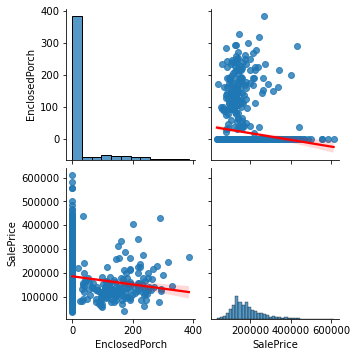

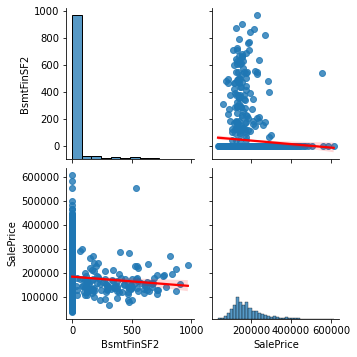

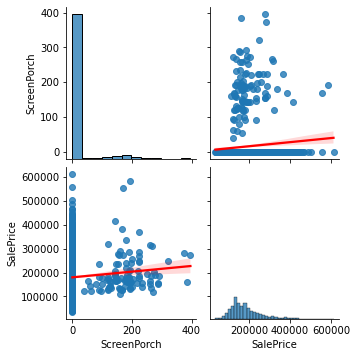

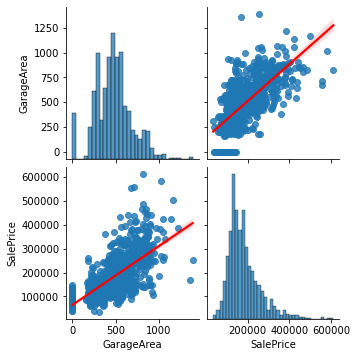

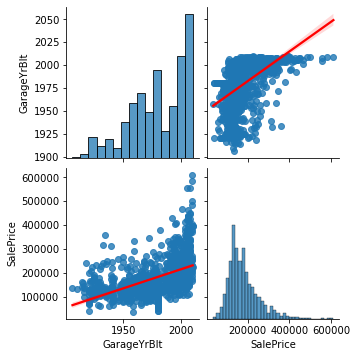

In [48]:
# Just picked some interested value to see the linear relation 
columns = ['EnclosedPorch','BsmtFinSF2','ScreenPorch','GarageArea','GarageYrBlt']
for column in columns:
        sns.pairplot(df[[column,"SalePrice"]],kind="reg", plot_kws={'line_kws':{'color':'red'}})

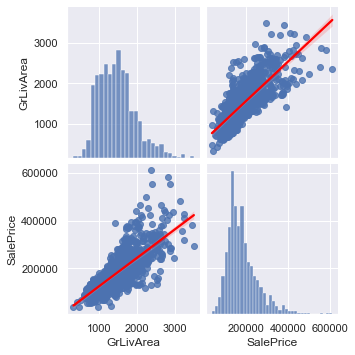

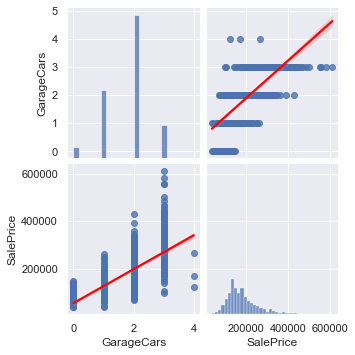

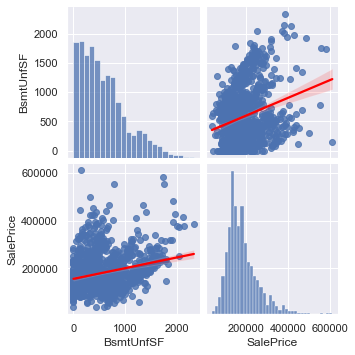

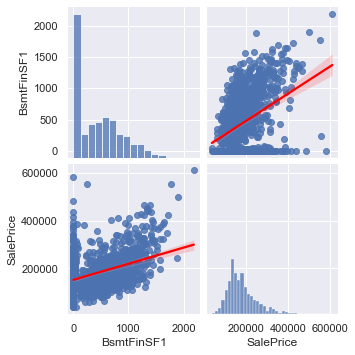

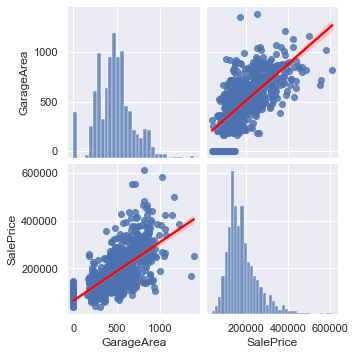

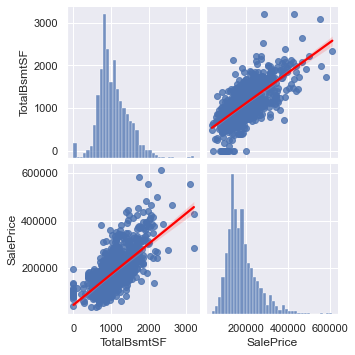

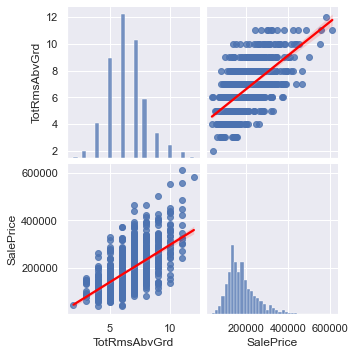

In [49]:
sns.set()
cols = [ 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF',  'TotRmsAbvGrd']
#sns.pairplot(df[cols], kind="reg",plot_kws={'line_kws':{'color':'red'}} )

for column in cols:
    sns.pairplot(df[[column,"SalePrice"]],kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

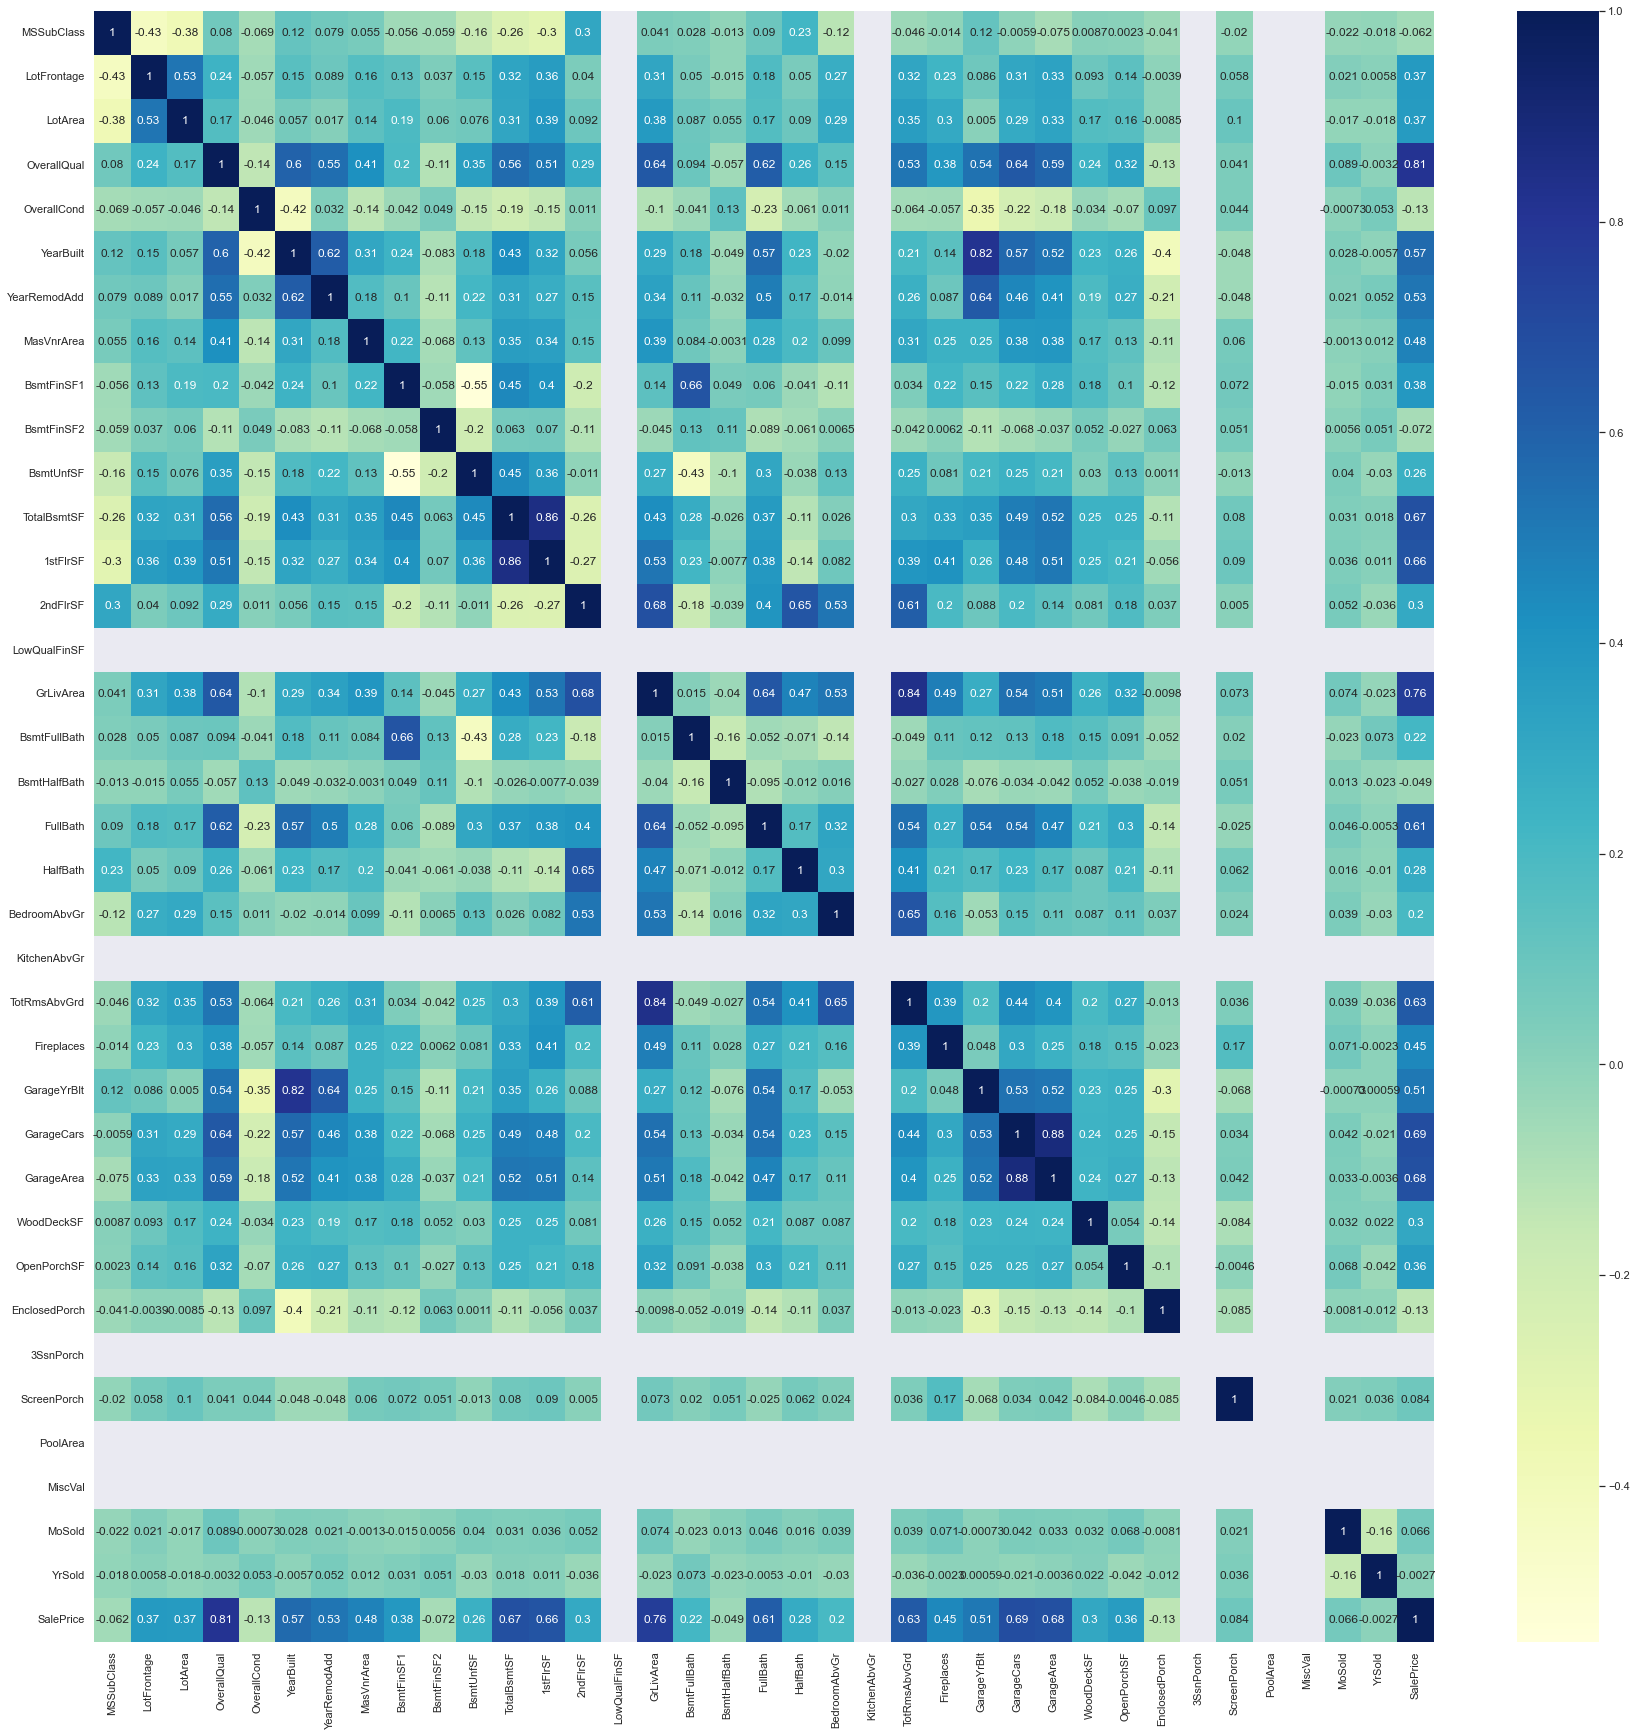

In [50]:
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [51]:
# we will drop these columns as it is no coreelation by one value and it won't add any extra information to our model
df = df.drop(['PoolArea','MiscVal','3SsnPorch','LowQualFinSF','KitchenAbvGr'],axis=1)

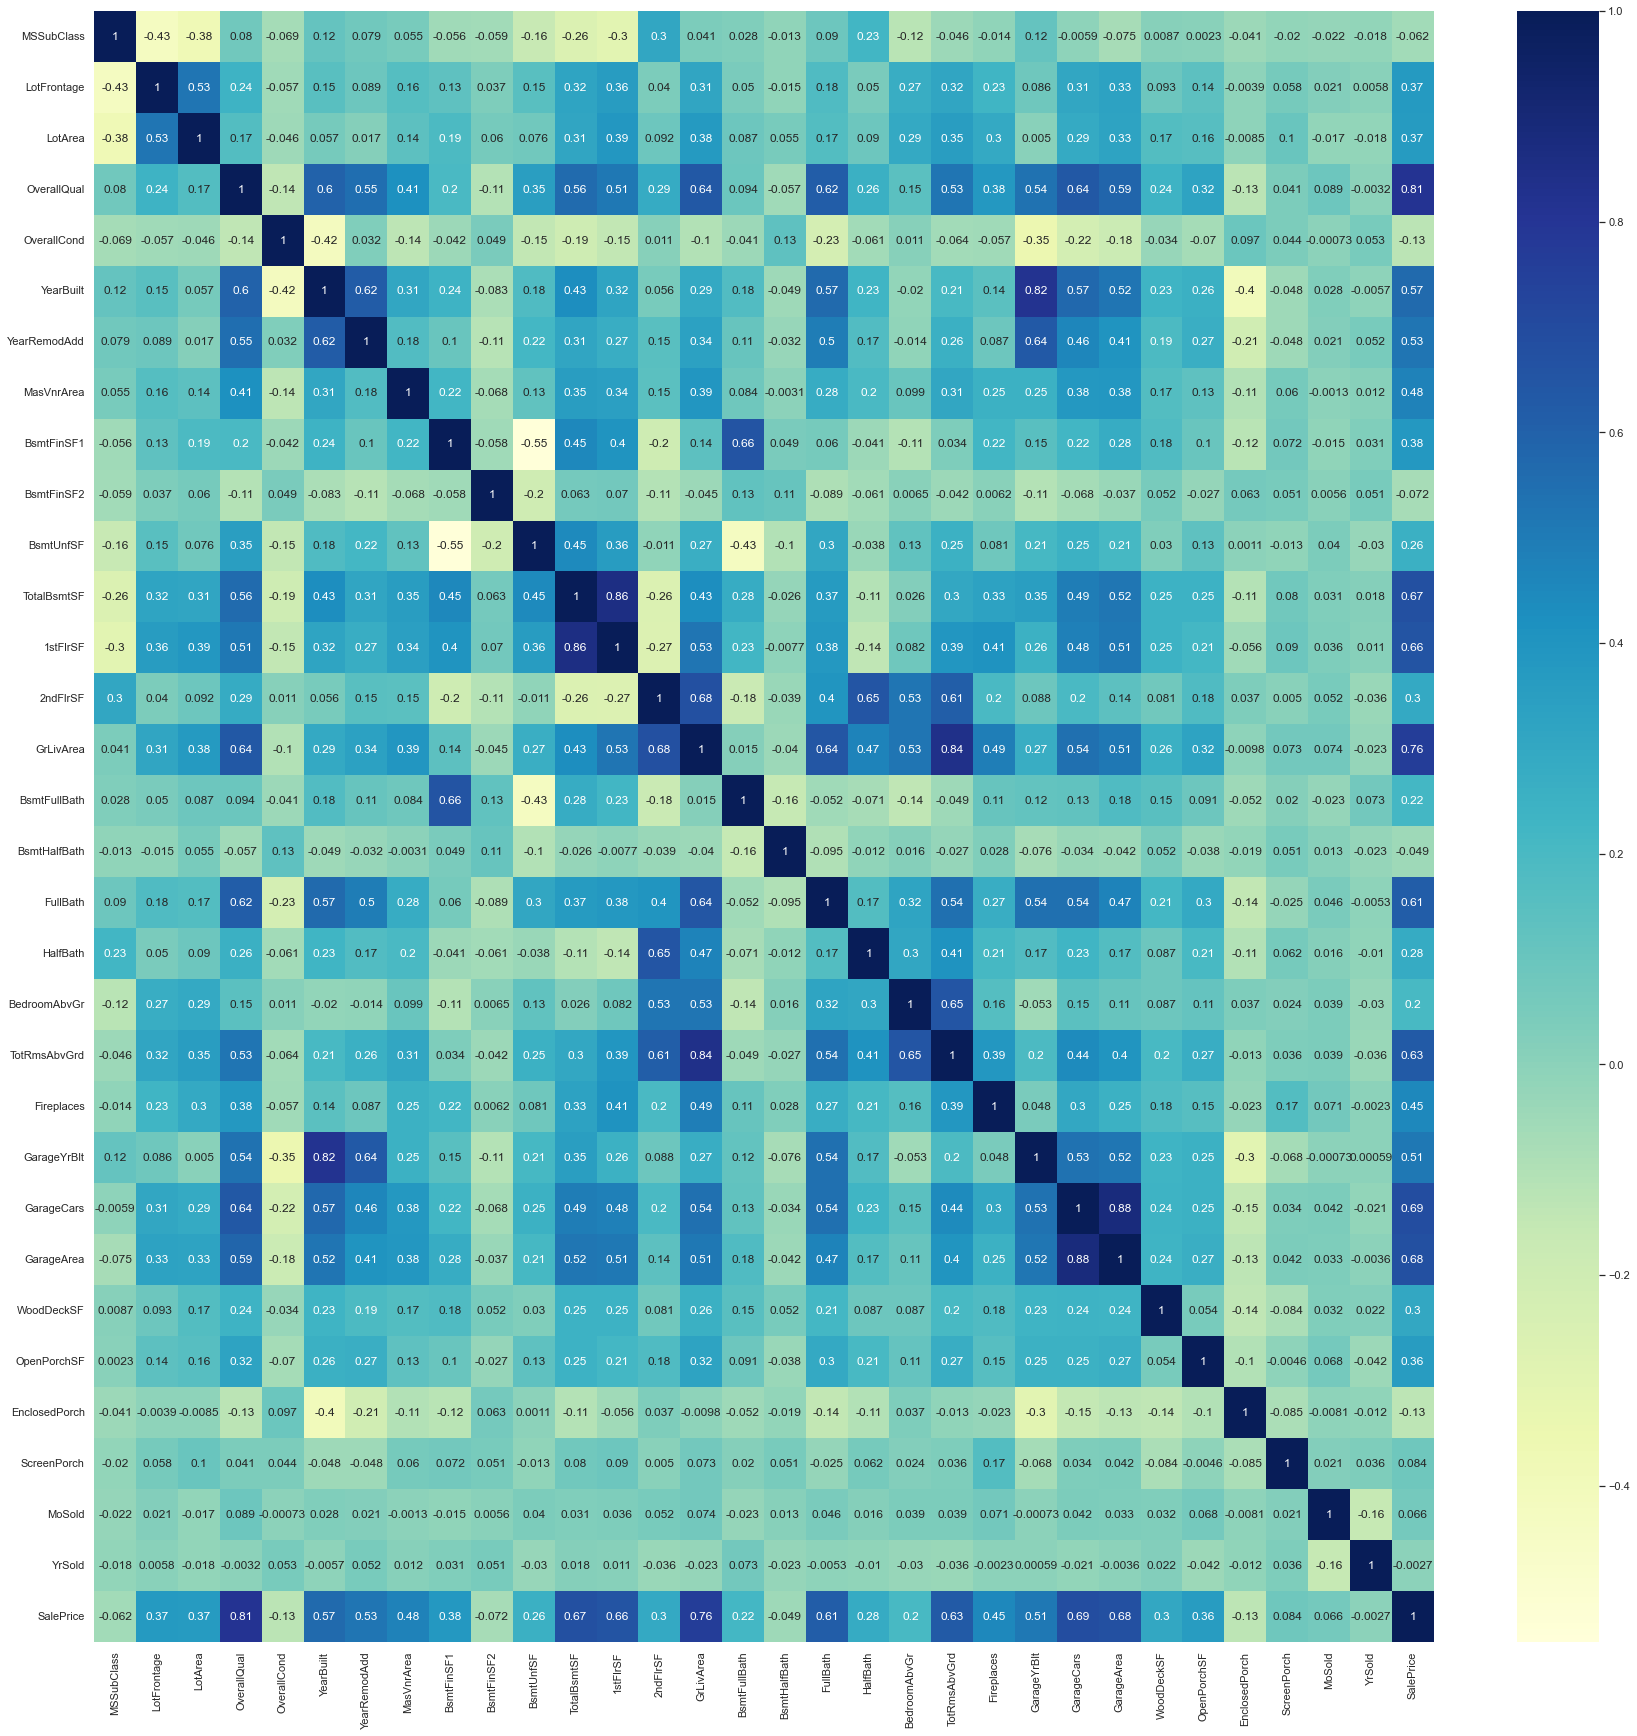

In [52]:
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [53]:
#Dummy variable  with n-1 so the features also increased 

display(df.shape)
df.select_dtypes(include='object').columns

df=pd.get_dummies(df,drop_first=True)
df.head()
display(df.shape)

(1266, 70)

(1266, 218)

In [54]:
y = df.pop('SalePrice')
y.head()
X = df
X.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [55]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
10,20,70.0,11200,5,5,1965,1965,0.0,906,0,...,0,0,0,0,1,0,0,0,1,0
836,30,90.0,8100,5,6,1948,1973,0.0,338,0,...,0,0,0,0,0,0,0,0,1,0
366,20,69.0,9500,6,5,1963,1963,247.0,609,0,...,0,0,0,0,1,0,0,0,1,0
1256,20,91.0,14303,8,5,1994,1994,554.0,1314,0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (848, 217)
X_test shape (418, 217)
y_train shape (848,)
y_test shape (418,)


In [57]:
# One point to keep in mind is that we need to standardise the data whenever working with Ridge regression. 
#We have seen that regularization puts a constraint on the magnitude of the model coefficients.
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold',
       'YrSold'],
      dtype='object')

In [58]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr',  'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,2001.0,2,608,0,42,0,0,9,2008
10,20,70.0,11200,5,5,1965,1965,0.0,906,0,...,0,1965.0,1,384,0,0,0,0,2,2008
836,30,90.0,8100,5,6,1948,1973,0.0,338,0,...,0,1948.0,2,812,0,116,230,0,6,2007
366,20,69.0,9500,6,5,1963,1963,247.0,609,0,...,2,1963.0,2,514,0,76,0,185,7,2009
1256,20,91.0,14303,8,5,1994,1994,554.0,1314,0,...,1,1994.0,2,691,262,36,0,0,8,2008


In [59]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,...,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,54.221698,69.180425,9605.031840,6.187500,5.568396,1974.272406,1986.636792,108.018868,440.716981,40.270047,...,0.003538,0.001179,0.101415,0.001179,0.857311,0.002358,0.001179,0.014151,0.820755,0.103774
std,40.365601,19.973932,4039.853226,1.383486,1.077862,29.529728,20.516821,178.286054,430.952190,138.177269,...,0.059409,0.034340,0.302056,0.034340,0.349961,0.048536,0.034340,0.118183,0.383784,0.305147
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7444.000000,5.000000,5.000000,1955.000000,1969.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9434.500000,6.000000,5.000000,1977.000000,1996.000000,0.000000,395.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,79.000000,11429.750000,7.000000,6.000000,2003.000000,2005.000000,174.000000,714.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,182.000000,36500.000000,10.000000,9.000000,2009.000000,2010.000000,1129.000000,2188.000000,972.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling

In [60]:
#Scaling using MinMax.Ridge regression need this 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()

In [61]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [62]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
2,0.235294,0.291925,0.282670,0.666667,0.500,0.940299,0.866667,0.143490,0.222121,0.0,...,0,0,0,0,1,0,0,0,1,0
10,0.000000,0.304348,0.281250,0.444444,0.500,0.671642,0.250000,0.000000,0.414077,0.0,...,0,0,0,0,1,0,0,0,1,0
836,0.058824,0.428571,0.193182,0.444444,0.625,0.544776,0.383333,0.000000,0.154479,0.0,...,0,0,0,0,0,0,0,0,1,0
366,0.000000,0.298137,0.232955,0.555556,0.500,0.656716,0.216667,0.218778,0.278336,0.0,...,0,0,0,0,1,0,0,0,1,0
1256,0.000000,0.434783,0.369403,0.777778,0.500,0.888060,0.733333,0.490700,0.600548,0.0,...,0,0,0,0,1,0,0,0,1,0


In [63]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,...,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,0.201304,0.299257,0.235938,0.576389,0.571050,0.740839,0.610613,0.095677,0.201425,0.041430,...,0.003538,0.001179,0.101415,0.001179,0.857311,0.002358,0.001179,0.014151,0.820755,0.103774
std,0.237445,0.124062,0.114769,0.153721,0.134733,0.220371,0.341947,0.157915,0.196962,0.142158,...,0.059409,0.034340,0.302056,0.034340,0.349961,0.048536,0.034340,0.118183,0.383784,0.305147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242236,0.174545,0.444444,0.500000,0.597015,0.329167,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.298137,0.231094,0.555556,0.500000,0.761194,0.766667,0.000000,0.180530,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.235294,0.360248,0.287777,0.666667,0.625000,0.955224,0.916667,0.154119,0.326554,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
X_train.shape

(848, 217)

In [65]:
# We have data with 217 features now 
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (848, 217)
X_test shape (418, 217)
y_train shape (848,)
y_test shape (418,)


#####  1) For LinearRegression with RFE

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=25)             # running RFE to extract for 25 
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 42),
 ('LotFrontage', False, 98),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 145),
 ('MasVnrArea', False, 91),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 15),
 ('BsmtUnfSF', False, 14),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 152),
 ('BsmtHalfBath', False, 151),
 ('FullBath', False, 105),
 ('HalfBath', False, 140),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 168),
 ('GarageYrBlt', False, 45),
 ('GarageCars', False, 6),
 ('GarageArea', False, 112),
 ('WoodDeckSF', False, 108),
 ('OpenPorchSF', False, 113),
 ('EnclosedPorch', False, 109),
 ('ScreenPorch', False, 72),
 ('MoSold', False, 192),
 ('YrSold', False, 141),
 ('MSZoning_FV', False, 47),
 ('MSZoning_RH', False, 67),
 ('MSZoning_RL', False, 50),
 ('MSZoning_RM', False, 51),
 ('Street_Pave', False, 128),

In [69]:
# Verify 25 selected features over 271
col = X_train.columns[rfe.support_]
display(len(col))
display(col.to_list())

25

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'LandSlope_Sev',
 'HouseStyle_2.5Fin',
 'RoofMatl_Tar&Grv',
 'Exterior1st_BrkComm',
 'Exterior1st_Stone',
 'Foundation_Slab',
 'BsmtCond_Po',
 'Electrical_Mix',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Mod',
 'GarageType_BuiltIn',
 'SaleCondition_Alloca']

In [70]:
# Extract the non-important features
X_train.columns[~rfe.support_]


Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=192)

In [71]:
X_train_rfe=X_train[col]
X_test_rfe=X_test[col]
print(X_train_rfe.shape)
print(X_train_rfe.shape)
print("Original Data Set")

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(848, 25)
(848, 25)
Original Data Set
(848, 217)
(418, 217)
(848,)
(418,)


In [72]:
# Fit the regression with the RFE selected features 
lm_rfe =lm.fit(X_train, y_train)

In [73]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [74]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for the taining set for LR : {}".format(r2_train_lr))
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score for the Test set for LR    : {}".format(r2_test_lr))
#print(r2_test_lr)
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS For Train set for LR            : {}".format(rss1_lr))
#print(rss1_lr)
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS For Test set for LR             :  {}".format(rss1_lr))
#print(rss2_lr)
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for tain set for LR             : {}".format(mse_train_lr))
#print(mse_train_lr)
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for tain set for LR             : {}".format(mse_test_lr))
#print(mse_test_lr)
metric_lr.append(mse_test_lr**0.5)

R2 Score for the taining set for LR : 0.890683419758976
R2 Score for the Test set for LR    : 0.8645586966774109
RSS For Train set for LR            : 553541216983.703
RSS For Test set for LR             :  553541216983.703
MSE for tain set for LR             : 652760869.0845554
MSE for tain set for LR             : 710065390.116306


In [75]:
lm.coef_

array([-9.15777063e+03,  1.25239304e+04,  4.49459108e+04,  5.69446003e+04,
        4.85339290e+04,  3.26160477e+04,  2.13134334e+03,  2.32809417e+04,
        7.91222073e+15,  3.51493535e+15,  8.44741665e+15, -1.15935008e+16,
       -1.07866973e+16, -7.64829003e+15,  1.32898505e+16, -2.70097656e+03,
       -3.69732812e+03,  1.28194062e+04,  3.30265625e+03, -4.25593750e+04,
        3.60648750e+04,  9.62250000e+02,  7.67206250e+03,  2.21271250e+04,
        1.24478750e+04,  9.81227344e+03,  7.13043750e+03,  9.49087500e+03,
        1.85301562e+04, -2.92750000e+02, -2.68537500e+03,  6.19918125e+04,
        3.12588750e+04,  4.21200000e+04,  4.07155000e+04, -8.01003125e+03,
       -6.92578125e+02, -5.45106250e+03, -4.76000000e+02,  4.35215625e+03,
       -2.06062891e+04, -2.46918750e+03, -3.23485000e+04,  2.75975000e+03,
       -6.36156250e+03, -2.86488320e+04, -7.22656250e+02, -3.99375000e+02,
       -3.81185625e+04, -4.02946875e+03, -2.18432422e+03, -1.24457500e+04,
       -1.82275938e+04, -

##### 2) Ridge  Model

In [76]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [77]:
# list of alphas to tune Just include more alpha less than 0.1 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.60, 0.75, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.6, 0.75, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
# cv_results
rigid_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
#rigid_cv_results = rigid_cv_results[rigid_cv_results['param_alpha']<=]
rigid_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005915,0.001476,0.002432,0.000138,0.0001,{'alpha': 0.0001},-19502.453997,-19046.481882,-16759.040615,-19638.169277,...,-18445.133148,1192.010486,26,-11507.700475,-10822.077932,-12037.569009,-11451.643100,-12173.152786,-11598.428660,480.759841
1,0.004572,0.000064,0.002237,0.000068,0.001,{'alpha': 0.001},-19481.215740,-19040.793549,-16757.297047,-19641.165215,...,-18435.659281,1193.047700,25,-11508.455914,-10822.649913,-12038.867002,-11453.018099,-12174.092443,-11599.416674,480.924492
2,0.004824,0.000524,0.002243,0.000064,0.01,{'alpha': 0.01},-19344.843734,-18982.736901,-16666.616101,-19633.976409,...,-18354.517791,1210.436120,24,-11537.816941,-10828.622223,-12048.885127,-11464.944642,-12182.163573,-11612.486501,480.991284
3,0.004994,0.000305,0.002323,0.000090,0.05,{'alpha': 0.05},-19223.843257,-18765.222281,-16267.061134,-19407.870526,...,-18137.417699,1259.243144,23,-11611.209197,-10859.260056,-12079.538915,-11510.146964,-12199.694197,-11651.969866,476.021269
4,0.004451,0.000033,0.002161,0.000009,0.6,{'alpha': 0.6},-18258.872379,-17952.072903,-15195.416850,-17584.299497,...,-17157.945980,1095.880251,15,-11933.618932,-11181.447132,-12339.937210,-11895.620836,-12366.752901,-11943.475402,428.817001


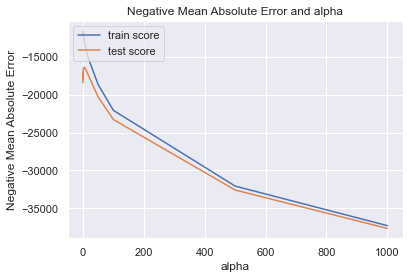

In [79]:
# plotting mean test and train scoes with alpha 
rigid_cv_results['param_alpha'] = rigid_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(rigid_cv_results['param_alpha'], rigid_cv_results['mean_train_score'])
plt.plot(rigid_cv_results['param_alpha'], rigid_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [80]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

# You can see that alpha is best at 2.0 

{'alpha': 4.0}
-16407.33564382219


In [81]:
# Let's make a model with 2.0 Alpha for Ridge.Note this Alpha can make son=me betas to 0 so that it is not significant 
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.28298655e+04,  1.56197409e+04,  2.17210644e+04,  4.84253624e+04,
        2.61078606e+04,  1.49311964e+04,  6.97621866e+03,  2.22283596e+04,
        3.82557858e+04,  3.66978123e+03,  1.00180298e+04,  3.45205254e+04,
        4.96732456e+04,  3.05961278e+04,  5.79252808e+04,  9.52628135e+02,
       -1.98412990e+03,  1.97098821e+04,  7.93639998e+03, -1.17185889e+04,
        3.52314579e+04,  1.07366286e+04,  2.62663618e+03,  2.04638990e+04,
        2.08713559e+04,  1.14663879e+04,  9.25264562e+03,  4.43285888e+03,
        1.06341951e+04,  6.41510675e+02, -2.06230459e+03,  1.18358539e+04,
       -1.00919436e+03,  6.29867872e+03,  2.16897419e+03,  4.30956261e+03,
        1.40482093e+03, -1.13006979e+03, -1.72973957e+03,  7.00616579e+03,
       -1.19458232e+04,  8.36241331e+01, -5.34715340e+03,  4.53635392e+03,
       -8.24919901e+03, -6.81351787e+03, -1.20309989e+03, -8.18364436e+02,
       -1.67705745e+04,  2.41082481e+02,  2.28454602e+03, -5.45665230e+01,
       -7.66209951e+03, -

In [82]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for the taining set for RIDGE : {}".format(r2_train_lr))
#print(r2_train_lr)
metric_ridge.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score for the Test set for RIDGE    : {}".format(r2_test_lr))
#print(r2_test_lr)
metric_ridge.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS For Train set for RIDGE            : {}".format(rss1_lr))
#print(rss1_lr)
metric_ridge.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS For Test set for RIDGE             :  {}".format(rss1_lr))
#print(rss2_lr)
metric_ridge.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for tain set for RIDGE             : {}".format(mse_train_lr))
#print(mse_train_lr)
metric_ridge.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for tain set for RIDGE             : {}".format(mse_test_lr))
#print(mse_test_lr)
metric_ridge.append(mse_test_lr**0.5)

R2 Score for the taining set for RIDGE : 0.9352106140006874
R2 Score for the Test set for RIDGE    : 0.9231963173529658
RSS For Train set for RIDGE            : 328070961373.0452
RSS For Test set for RIDGE             :  328070961373.0452
MSE for tain set for RIDGE             : 386876133.69462883
MSE for tain set for RIDGE             : 402651447.84707475


#### 3) Lasso Model

In [83]:

lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.6, 0.75, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# cv_results
lasso_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005915,0.001476,0.002432,0.000138,0.0001,{'alpha': 0.0001},-19502.453997,-19046.481882,-16759.040615,-19638.169277,...,-18445.133148,1192.010486,26,-11507.700475,-10822.077932,-12037.569009,-11451.643100,-12173.152786,-11598.428660,480.759841
1,0.004572,0.000064,0.002237,0.000068,0.001,{'alpha': 0.001},-19481.215740,-19040.793549,-16757.297047,-19641.165215,...,-18435.659281,1193.047700,25,-11508.455914,-10822.649913,-12038.867002,-11453.018099,-12174.092443,-11599.416674,480.924492
2,0.004824,0.000524,0.002243,0.000064,0.01,{'alpha': 0.01},-19344.843734,-18982.736901,-16666.616101,-19633.976409,...,-18354.517791,1210.436120,24,-11537.816941,-10828.622223,-12048.885127,-11464.944642,-12182.163573,-11612.486501,480.991284
3,0.004994,0.000305,0.002323,0.000090,0.05,{'alpha': 0.05},-19223.843257,-18765.222281,-16267.061134,-19407.870526,...,-18137.417699,1259.243144,23,-11611.209197,-10859.260056,-12079.538915,-11510.146964,-12199.694197,-11651.969866,476.021269
4,0.004451,0.000033,0.002161,0.000009,0.6,{'alpha': 0.6},-18258.872379,-17952.072903,-15195.416850,-17584.299497,...,-17157.945980,1095.880251,15,-11933.618932,-11181.447132,-12339.937210,-11895.620836,-12366.752901,-11943.475402,428.817001


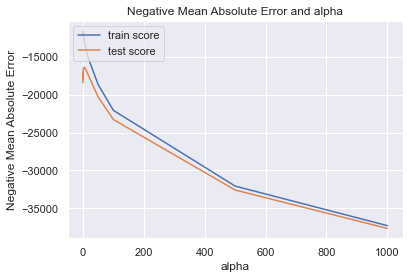

In [85]:
# plotting mean test and train scoes with alpha 
rigid_cv_results['param_alpha'] = rigid_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(rigid_cv_results['param_alpha'], rigid_cv_results['mean_train_score'])
plt.plot(rigid_cv_results['param_alpha'], rigid_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [86]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

# Let's make a model with 2.0 Alpha for Lasso. 

{'alpha': 100}
-16214.887947542491


In [87]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [88]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for the taining set for LASSO : {}".format(r2_train_lr))
#print(r2_train_lr)
metric_lasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score for the Test set for LASSO    : {}".format(r2_test_lr))
#print(r2_test_lr)
metric_lasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS For Train set for LASSO            : {}".format(rss1_lr))
#print(rss1_lr)
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS For Test set for LASSO             :  {}".format(rss1_lr))
#print(rss2_lr)
metric_lasso.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for tain set for LASSO             : {}".format(mse_train_lr))
#print(mse_train_lr)
metric_lasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for tain set for LASSO             : {}".format(mse_test_lr))
#print(mse_test_lr)
metric_lasso.append(mse_test_lr**0.5)

R2 Score for the taining set for LASSO : 0.9316776692811829
R2 Score for the Test set for LASSO    : 0.9194279480889649
RSS For Train set for LASSO            : 345960567096.7044
RSS For Test set for LASSO             :  345960567096.7044
MSE for tain set for LASSO             : 407972366.85932124
MSE for tain set for LASSO             : 422407523.1793683


In [89]:
print(metric_ridge)

[0.9352106140006874, 0.9231963173529658, 328070961373.0452, 168308305200.07724, 19669.167081872805, 20066.17671224578]


In [90]:
# Create a summary table 
pd.set_option('display.float_format', lambda x: '%.5f' % x)
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.89068,0.93521,0.93168
1,R2 Score (Test),0.86456,0.92320,0.91943
2,RSS (Train),553541216983.70300,328070961373.04523,345960567096.70441
3,RSS (Test),296807333068.61591,168308305200.07724,176566344688.97595
4,MSE (Train),25549.18529,19669.16708,20198.32584
5,MSE (Test),26647.05218,20066.17671,20552.55515


### Validae Assiumption and model Evaluation 

1.Linearity: The relationship between X and the mean of Y is linear.

2.Homoscedasticity: The variance of residual is the same for any value of X.

3.Independence: Observations are independent of each other.

4.Normality: For any fixed value of X, Y is normally distributed.


In [91]:
ridge_pred = ridge.predict(X_test)

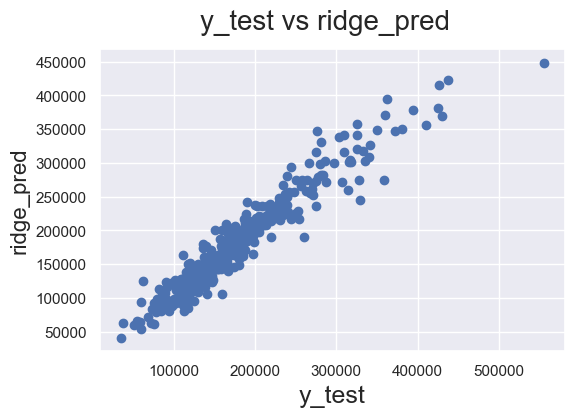

In [92]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

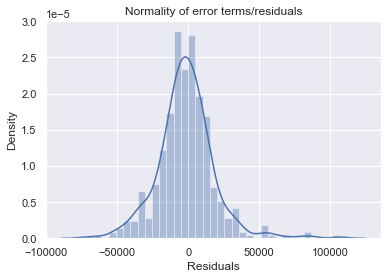

In [93]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [94]:
lasso_pred = lasso.predict(X_test)

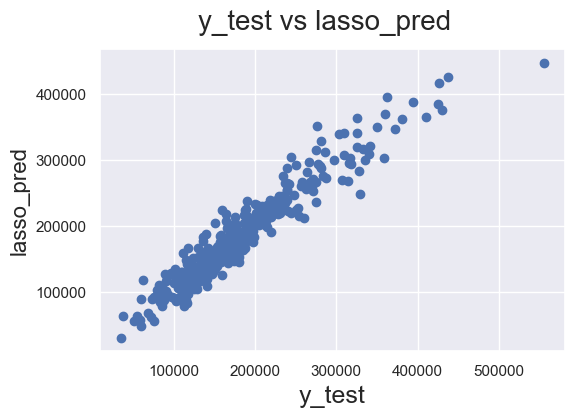

In [95]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

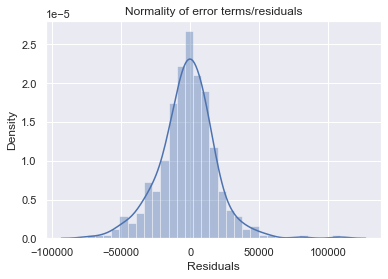

In [96]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [97]:
coeficient = pd.DataFrame(index=X_train.columns)

In [98]:
coeficient.rows = X_train.columns

In [99]:
coeficient['LinearRegression'] = lm.coef_
coeficient['Ridge'] = ridge.coef_
coeficient['Lasso'] = lasso.coef_

In [100]:
coeficient

# You can see that in lasso SaleCondition_Alloca/Electrical_Mix/BsmtCond_Po/Exterior1st_BrkComm/1stFlrSF and 1stFlrSF and all are 0 which means it consider as not important 
# So for Rigid 25  Features are selected and the beta are as listed below . Note there are negative correlatino and possitive as well 
# For lasso 19 has been selected as 6 are of not significant

,LinearRegression,Ridge,Lasso
MSSubClass,-9157.77063,-12829.86552,-19234.04857
LotFrontage,12523.93042,15619.74089,11725.04160
LotArea,44945.91080,21721.06436,11596.03239
OverallQual,56944.60032,48425.36245,76336.32783
OverallCond,48533.92901,26107.86060,27303.60026
...,...,...,...
SaleCondition_AdjLand,8953.14062,2806.06522,0.00000
SaleCondition_Alloca,-60430.72656,-8697.59857,-0.00000
SaleCondition_Family,-1033.56250,-3096.45324,-0.00000
SaleCondition_Normal,5649.00000,8362.90805,8119.54639


In [101]:
coeficient.sort_values(by=['Ridge'],ascending=False)

,LinearRegression,Ridge,Lasso
GrLivArea,13289850495897624.00000,57925.28082,167110.91337
1stFlrSF,-10786697268448480.00000,49673.24560,17682.42979
OverallQual,56944.60032,48425.36245,76336.32783
BsmtFinSF1,7912220728521684.00000,38255.78583,38074.00239
Neighborhood_StoneBr,41349.98438,37728.07136,41405.05830
...,...,...,...
ExterQual_TA,-8053.87500,-16143.44210,-12794.43138
LandSlope_Sev,-38118.56250,-16770.57449,-13589.87482
KitchenQual_Fa,-26099.78125,-20196.03432,-18528.91598
KitchenQual_Gd,-29432.37500,-24177.18885,-26222.70704


In [102]:
coeficient['Ridge'].sort_values(ascending=False)

GrLivArea               57925.28082
1stFlrSF                49673.24560
OverallQual             48425.36245
BsmtFinSF1              38255.78583
Neighborhood_StoneBr    37728.07136
                           ...     
ExterQual_TA           -16143.44210
LandSlope_Sev          -16770.57449
KitchenQual_Fa         -20196.03432
KitchenQual_Gd         -24177.18885
KitchenQual_TA         -25157.54744
Name: Ridge, Length: 217, dtype: float64

In [103]:
coeficient['Lasso'].sort_values(ascending=False)

GrLivArea              167110.91337
OverallQual             76336.32783
Neighborhood_StoneBr    41405.05830
BsmtFinSF1              38074.00239
OverallCond             27303.60026
                           ...     
LandSlope_Sev          -13589.87482
KitchenQual_Fa         -18528.91598
MSSubClass             -19234.04857
KitchenQual_Gd         -26222.70704
KitchenQual_TA         -26665.94408
Name: Lasso, Length: 217, dtype: float64

In [104]:
coeficient['LinearRegression'].sort_values(ascending=False)

GrLivArea            13289850495897624.00000
BsmtUnfSF             8447416646129873.00000
BsmtFinSF1            7912220728521684.00000
BsmtFinSF2            3514935351050622.00000
Heating_Wall           877754187799204.00000
                              ...           
RoofStyle_Mansard    -1800984396294586.00000
RoofMatl_Tar&Grv     -1800984396340773.75000
2ndFlrSF             -7648290028871072.00000
1stFlrSF            -10786697268448480.00000
TotalBsmtSF         -11593500756583708.00000
Name: LinearRegression, Length: 217, dtype: float64

### Q1 . Which variables are significant in predicting the price of a house

In [105]:
# Using RFE We got the below 
X_train_rfe.columns.to_list()

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'LandSlope_Sev',
 'HouseStyle_2.5Fin',
 'RoofMatl_Tar&Grv',
 'Exterior1st_BrkComm',
 'Exterior1st_Stone',
 'Foundation_Slab',
 'BsmtCond_Po',
 'Electrical_Mix',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Mod',
 'GarageType_BuiltIn',
 'SaleCondition_Alloca']

In [106]:
#Using Rigid whcih has the best Test and Train score in outr training top 5 are as below 
#GrLivArea           
#OverallQual             
#Neighborhood_StoneBr   
#BsmtFinSF1              
#OverallCond             

### Q2. How well those variables describe the price of a house.

# So you can see that some of the key contributer features as as flow as they have Highere values of positive coefficient 

OverallQual

TotalBsmtSF

GrLivArea

TotRmsAbvGrd

YearBuilt

# Below are some of them which will reduce the Housing price 

BedroomAbvGr

KitchenQual_TA

RoofMatl_Tar 

You can calculate the significance with highest coefficient 

In [107]:
coeficient.sort_values(by=['Ridge']).head(10)

,LinearRegression,Ridge,Lasso
KitchenQual_TA,-30472.50000,-25157.54744,-26665.94408
KitchenQual_Gd,-29432.37500,-24177.18885,-26222.70704
KitchenQual_Fa,-26099.78125,-20196.03432,-18528.91598
LandSlope_Sev,-38118.56250,-16770.57449,-13589.87482
ExterQual_TA,-8053.87500,-16143.44210,-12794.43138
BsmtQual_Gd,-9848.25000,-14706.59364,-11571.30624
Neighborhood_Gilbert,-19561.96875,-14471.24673,-4881.43965
RoofMatl_Tar&Grv,-1800984396340773.75000,-13840.73258,-13463.87599
BsmtQual_TA,-7255.50000,-13813.90980,-8251.38108
ExterQual_Gd,-9655.12500,-13616.24065,-10526.56106


### Part - 2  Assignment Workout 

In [108]:
alpha =200

lasso_double = Lasso(alpha=alpha)
        
lasso_double.fit(X_train, y_train) 

Lasso(alpha=200)

In [109]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_double.predict(X_train)
y_pred_test = lasso_double.predict(X_test)

metric_lasso_double = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for the taining set for LASSO DOUBLE: {}".format(r2_train_lr))
#print(r2_train_lr)
metric_lasso_double.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score for the Test set for LASSO  DOUBLE  : {}".format(r2_test_lr))
#print(r2_test_lr)
metric_lasso_double.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS For Train set for LASSO  DOUBLE          : {}".format(rss1_lr))
#print(rss1_lr)
metric_lasso_double.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS For Test set for LASSO  DOUBLE           :  {}".format(rss1_lr))
#print(rss2_lr)
metric_lasso_double.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for tain set for LASSO   DOUBLE          : {}".format(mse_train_lr))
#print(mse_train_lr)
metric_lasso_double.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for tain set for LASSO    DOUBLE         : {}".format(mse_test_lr))
#print(mse_test_lr)
metric_lasso_double.append(mse_test_lr**0.5)

R2 Score for the taining set for LASSO DOUBLE: 0.9229793296878369
R2 Score for the Test set for LASSO  DOUBLE  : 0.9140137777706939
RSS For Train set for LASSO  DOUBLE          : 390005939478.66406
RSS For Test set for LASSO  DOUBLE           :  390005939478.66406
MSE for tain set for LASSO   DOUBLE          : 459912664.4795567
MSE for tain set for LASSO    DOUBLE         : 450791885.0017196


In [110]:
alpha = 8
ridge_double = Ridge(alpha=alpha)
ridge_double.fit(X_train, y_train)

Ridge(alpha=8)

In [111]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_double.predict(X_train)
y_pred_test = ridge_double.predict(X_test)

metric_ridge_double = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for the taining set for RIDGE DOUBLE : {}".format(r2_train_lr))
#print(r2_train_lr)
metric_ridge_double.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score for the Test set for RIDGE  DOUBLE   : {}".format(r2_test_lr))
#print(r2_test_lr)
metric_ridge_double.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS For Train set for RIDGE  DOUBLE           : {}".format(rss1_lr))
#print(rss1_lr)
metric_ridge_double.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS For Test set for RIDGE  DOUBLE            :  {}".format(rss1_lr))
#print(rss2_lr)
metric_ridge_double.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for tain set for RIDGE  DOUBLE            : {}".format(mse_train_lr))
#print(mse_train_lr)
metric_ridge_double.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for tain set for RIDGE  DOUBLE            : {}".format(mse_test_lr))
#print(mse_test_lr)
metric_ridge_double.append(mse_test_lr**0.5)

R2 Score for the taining set for RIDGE DOUBLE : 0.9281791890371884
R2 Score for the Test set for RIDGE  DOUBLE   : 0.9221488785963668
RSS For Train set for RIDGE  DOUBLE           : 363675656679.4954
RSS For Test set for RIDGE  DOUBLE            :  363675656679.4954
MSE for tain set for RIDGE  DOUBLE            : 428862802.68808424
MSE for tain set for RIDGE  DOUBLE            : 408142756.56223047


In [112]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.89068,0.93521,0.93168
1,R2 Score (Test),0.86456,0.92320,0.91943
2,RSS (Train),553541216983.70300,328070961373.04523,345960567096.70441
3,RSS (Test),296807333068.61591,168308305200.07724,176566344688.97595
4,MSE (Train),25549.18529,19669.16708,20198.32584
5,MSE (Test),26647.05218,20066.17671,20552.55515


In [113]:

rg_metric_double = pd.Series(metric_ridge_double, name = 'Ridge Regression Double')
ls_metric_double = pd.Series(metric_lasso_double, name = 'Lasso Regression Double')

final_metric_assignment = pd.concat([final_metric, rg_metric_double, ls_metric_double], axis = 1)

final_metric_assignment

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge Regression Double,Lasso Regression Double
0,R2 Score (Train),0.89068,0.93521,0.93168,0.92818,0.92298
1,R2 Score (Test),0.86456,0.92320,0.91943,0.92215,0.91401
2,RSS (Train),553541216983.70300,328070961373.04523,345960567096.70441,363675656679.49542,390005939478.66406
3,RSS (Test),296807333068.61591,168308305200.07724,176566344688.97595,170603672243.01233,188431007930.71878
4,MSE (Train),25549.18529,19669.16708,20198.32584,20709.00294,21445.57447
5,MSE (Test),26647.05218,20066.17671,20552.55515,20202.54332,21231.86014


In [114]:
coeficient['Ridge - Double'] = ridge_double.coef_
coeficient['Lasso - Double'] = lasso_double.coef_

In [115]:
coeficient.head(30)

,LinearRegression,Ridge,Lasso,Ridge - Double,Lasso - Double
MSSubClass,-9157.77063,-12829.86552,-19234.04857,-12471.88035,-18037.17074
LotFrontage,12523.93042,15619.74089,11725.04160,14369.15795,7371.58529
LotArea,44945.91080,21721.06436,11596.03239,17843.71974,277.47544
OverallQual,56944.60032,48425.36245,76336.32783,41842.23485,86964.96755
OverallCond,48533.92901,26107.86060,27303.60026,19317.27190,16390.00166
YearBuilt,32616.04774,14931.19644,22225.91783,10544.92925,13871.84328
YearRemodAdd,2131.34334,6976.21866,4491.74736,8366.46112,7204.16647
MasVnrArea,23280.94167,22228.35958,21877.33737,21260.10103,18878.03222
BsmtFinSF1,7912220728521684.00000,38255.78583,38074.00239,33046.64796,39631.49453
BsmtFinSF2,3514935351050622.00000,3669.78123,0.00000,2069.66928,0.00000


In [116]:
coeficient[['Ridge','Ridge - Double']].sort_values(by=['Ridge - Double'],ascending=False).head(20)

,Ridge,Ridge - Double
GrLivArea,57925.28082,48856.72185
1stFlrSF,49673.24560,42400.14285
OverallQual,48425.36245,41842.23485
BsmtFinSF1,38255.78583,33046.64796
TotRmsAbvGrd,35231.45786,32443.88648
Neighborhood_StoneBr,37728.07136,31383.39813
TotalBsmtSF,34520.52538,31005.16570
2ndFlrSF,30596.12783,25095.93952
GarageArea,20871.35590,21769.81039
GarageCars,20463.89902,21521.43214


In [117]:
pd.DataFrame(coeficient['Ridge'].sort_values(ascending=False).head(20))

,Ridge
GrLivArea,57925.28082
1stFlrSF,49673.24560
OverallQual,48425.36245
BsmtFinSF1,38255.78583
Neighborhood_StoneBr,37728.07136
TotRmsAbvGrd,35231.45786
TotalBsmtSF,34520.52538
2ndFlrSF,30596.12783
OverallCond,26107.86060
MasVnrArea,22228.35958


In [118]:
pd.DataFrame(coeficient['Ridge - Double'].sort_values(ascending=False).head(20))

,Ridge - Double
GrLivArea,48856.72185
1stFlrSF,42400.14285
OverallQual,41842.23485
BsmtFinSF1,33046.64796
TotRmsAbvGrd,32443.88648
Neighborhood_StoneBr,31383.39813
TotalBsmtSF,31005.16570
2ndFlrSF,25095.93952
GarageArea,21769.81039
GarageCars,21521.43214


In [119]:
coeficient['Lasso'].sort_values(ascending=False).head(10)

GrLivArea              167110.91337
OverallQual             76336.32783
Neighborhood_StoneBr    41405.05830
BsmtFinSF1              38074.00239
OverallCond             27303.60026
SaleType_New            26384.49962
TotalBsmtSF             25465.69355
GarageCars              25284.88530
TotRmsAbvGrd            24844.41091
YearBuilt               22225.91783
Name: Lasso, dtype: float64

In [120]:
coeficient['Lasso'].sort_values(ascending=False).head(10)

GrLivArea              167110.91337
OverallQual             76336.32783
Neighborhood_StoneBr    41405.05830
BsmtFinSF1              38074.00239
OverallCond             27303.60026
SaleType_New            26384.49962
TotalBsmtSF             25465.69355
GarageCars              25284.88530
TotRmsAbvGrd            24844.41091
YearBuilt               22225.91783
Name: Lasso, dtype: float64

## Q3 

In [121]:
remove_cols = coeficient['Lasso'].sort_values(ascending=False).index[0:5].to_list()

In [122]:
remove_cols


['GrLivArea',
 'OverallQual',
 'Neighborhood_StoneBr',
 'BsmtFinSF1',
 'OverallCond']

In [123]:
print(X_train.shape)
print(X_test.shape)

X_train2 = X_train.drop(remove_cols,axis=1)
X_test2 = X_test.drop(remove_cols,axis=1)
print("New Data Set after removing")
print(X_train2.shape)
print(X_train2.shape)

(848, 217)
(418, 217)
New Data Set after removing
(848, 212)
(848, 212)


In [124]:
alpha =100
lasso_remove_top_features  = Lasso(alpha=alpha)
lasso_remove_top_features.fit(X_train2, y_train) 

Lasso(alpha=100)

In [125]:
lasso_remove_top_features.coef_

array([-1.51974775e+04,  1.39497333e+04,  2.78454142e+03,  1.83399819e+04,
        9.12531120e+03,  2.96704235e+04, -3.01489467e+03, -2.67032199e+04,
        8.04568675e+04,  1.55948049e+05,  1.00456584e+05,  0.00000000e+00,
       -0.00000000e+00,  5.57730327e+03,  0.00000000e+00, -1.77884653e+04,
        3.66626838e+04,  6.73459364e+03,  0.00000000e+00,  2.26667993e+04,
        2.03713761e+04,  7.70016017e+03,  4.34979968e+03,  0.00000000e+00,
        7.70112061e+03,  1.50172779e+03, -8.41436980e+02,  1.07808936e+04,
       -0.00000000e+00,  8.04791873e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.78036660e+03,  8.59873200e+03,
       -6.03625637e+03,  0.00000000e+00, -0.00000000e+00,  6.37344628e+03,
       -3.42060840e+03, -0.00000000e+00, -9.74994103e+02, -0.00000000e+00,
       -2.74180825e+04,  0.00000000e+00,  0.00000000e+00,  2.85147115e+03,
       -2.66274442e+03, -2.99104861e+03,  1.95409486e+04, -8.39819185e+03,
       -9.71133065e+03, -

In [126]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for tge Removed one 

y_pred_train = lasso_remove_top_features.predict(X_train2)
y_pred_test = lasso_remove_top_features.predict(X_test2)

metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for the taining set for LASSO : {}".format(r2_train_lr))
#print(r2_train_lr)
metric_lasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score for the Test set for LASSO    : {}".format(r2_test_lr))
#print(r2_test_lr)
metric_lasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS For Train set for LASSO            : {}".format(rss1_lr))
#print(rss1_lr)
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS For Test set for LASSO             :  {}".format(rss1_lr))
#print(rss2_lr)
metric_lasso.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for tain set for LASSO             : {}".format(mse_train_lr))
#print(mse_train_lr)
metric_lasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for tain set for LASSO             : {}".format(mse_test_lr))
#print(mse_test_lr)
metric_lasso.append(mse_test_lr**0.5)

R2 Score for the taining set for LASSO : 0.9204005141035227
R2 Score for the Test set for LASSO    : 0.9103152223221794
RSS For Train set for LASSO            : 403064166453.66144
RSS For Test set for LASSO             :  403064166453.66144
MSE for tain set for LASSO             : 475311517.0444121
MSE for tain set for LASSO             : 470181954.0057159


In [128]:
#important predictor variables
coefficeint_after_removal = pd.DataFrame(index=X_train2.columns)
coefficeint_after_removal.rows = X_train2.columns
coefficeint_after_removal['lasso_remove_top_features'] = lasso_remove_top_features.coef_
pd.set_option('display.max_rows', None)
coefficeint_after_removal.sort_values(by=['lasso_remove_top_features'],ascending=False)

,lasso_remove_top_features
1stFlrSF,155948.04897
2ndFlrSF,100456.58411
TotalBsmtSF,80456.86750
TotRmsAbvGrd,36662.68378
MasVnrArea,29670.42352
SaleType_New,26531.73827
Functional_Typ,23374.65261
GarageCars,22666.79925
BsmtExposure_Gd,20807.69514
GarageArea,20371.37610


In [129]:
! pip install mlxtend

In [131]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
##print(type(X_train))
models = [lm_rfe, ridge, lasso]

for model in models:
    mse, bias, var = bias_variance_decomp(model, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', num_rounds=200, random_seed=123)
    y_pred=model.predict(X_test)
    # summarize results
    print()
    print('MSE for  from bias_variance lib [avg expected loss]: %.3f' % mse)
    print('Avg for  Bias                                      : %.3f' % bias)
    print('Avg for Variance                                   : %.3f' % var)
    print('Mean for Square error by Sckit-learn lib           : %.3f' % metrics.mean_squared_error(y_test,y_pred))



MSE for  from bias_variance lib [avg expected loss]: 741227611.708
Avg for  Bias                                      : 511918691.077
Avg for Variance                                   : 229308920.630
Mean for Square error by Sckit-learn lib           : 987085612.466

MSE for  from bias_variance lib [avg expected loss]: 471148472.931
Avg for  Bias                                      : 400011499.972
Avg for Variance                                   : 71136972.960
Mean for Square error by Sckit-learn lib           : 567372034.120

MSE for  from bias_variance lib [avg expected loss]: 464035996.410
Avg for  Bias                                      : 404288075.437
Avg for Variance                                   : 59747920.973
Mean for Square error by Sckit-learn lib           : 534948830.194
